# ANSUR II Dataset - Body Proportion Analysis

## Imports

In [1]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns
from PIL import Image

import boto3

# set the max columns to none
pd.set_option('display.max_columns', None)

## Path

In [2]:
ansur_male_path = "../data/ansur/ANSUR II MALE Public.csv"
ansur_female_path = "../data/ansur/ANSUR II FEMALE Public.csv"

## S3

In [3]:
# AWS S3 Bucket
session = boto3.Session()
s3 = session.resource('s3')

BUCKET_NAME = 'aws-s3-anthropometric-stats'
img_folder = 'body_measurement_images/'

bucket = s3.Bucket(BUCKET_NAME)

## Dataframe

In [4]:
## Dataframe
ansur_male = pd.read_csv(ansur_male_path, encoding = 'cp1252')
ansur_female = pd.read_csv(ansur_female_path, encoding = 'cp1252')
ansur_female.rename(columns={'SubjectId':'subjectid'}, inplace=True)
df = pd.concat([ansur_male, ansur_female])
drop_list_nonnumeric = ["Date", "Installation", "Component","PrimaryMOS"]
df.drop(drop_list_nonnumeric, axis=1, inplace = True)

## Data Cleaning
NaN_list = []
for columns in df.columns:
    if df[columns].isnull().sum() > 0:
        #print("{name} = {qty}".format(name = columns, qty = df[columns].isnull().sum()))
        NaN_list.append(columns)
        
df = df.drop(NaN_list, axis=1)
df.drop("SubjectNumericRace", axis = 1, inplace = True)

## Proportion Measure or Constants

In [5]:
# Body Measurements - For Proportionality Constants
body_measurements = ['abdominalextensiondepthsitting',
    'acromialheight',
    'acromionradialelength',
    'anklecircumference',
    'axillaheight',
    'balloffootcircumference',
    'balloffootlength',
    'biacromialbreadth',
    'bicepscircumferenceflexed',
    'bicristalbreadth',
    'bideltoidbreadth',
    'bimalleolarbreadth',
    'bitragionchinarc',
    'bitragionsubmandibulararc',
    'bizygomaticbreadth',
    'buttockcircumference',
    'buttockdepth',
    'buttockheight',
    'buttockkneelength',
    'buttockpopliteallength',
    'calfcircumference',
    'cervicaleheight',
    'chestbreadth',
    'chestcircumference',
    'chestdepth',
    'chestheight',
    'crotchheight',
    'crotchlengthomphalion',
    'crotchlengthposterioromphalion',
    'earbreadth',
    'earlength',
    'earprotrusion',
    'elbowrestheight',
    'eyeheightsitting',
    'footbreadthhorizontal',
    'footlength',
    'forearmcenterofgriplength',
    'forearmcircumferenceflexed',
    'forearmforearmbreadth',
    'forearmhandlength',
    'functionalleglength',
    'handbreadth',
    'handcircumference',
    'handlength',
    'headbreadth',
    'headcircumference',
    'headlength',
    'heelanklecircumference',
    'heelbreadth',
    'hipbreadth',
    'hipbreadthsitting',
    'iliocristaleheight',
    'interpupillarybreadth',
    'interscyei',
    'interscyeii',
    'kneeheightmidpatella',
    'kneeheightsitting',
    'lateralfemoralepicondyleheight',
    'lateralmalleolusheight',
    'lowerthighcircumference',
    'mentonsellionlength',
    'neckcircumference',
    'neckcircumferencebase',
    'overheadfingertipreachsitting',
    'palmlength',
    'poplitealheight',
    'radialestylionlength',
    'shouldercircumference',
    'shoulderelbowlength',
    'shoulderlength',
    'sittingheight',
    'sleevelengthspinewrist',
    'sleeveoutseam',
    'span',
    'suprasternaleheight',
    'tenthribheight',
    'thighcircumference',
    'thighclearance',
    'thumbtipreach',
    'tibialheight',
    'tragiontopofhead',
    'trochanterionheight',
    'verticaltrunkcircumferenceusa',
    'waistbacklength',
    'waistbreadth',
    'waistcircumference',
    'waistdepth',
    'waistfrontlengthsitting',
    'waistheightomphalion',
    'wristcircumference',
    'wristheight']

# Compute Constants
for col in df.columns:
    if col in body_measurements:
        df[col+"_pconstant"] = df[col]/df["stature"]

In [6]:
df.head()

subjectid  abdominalextensiondepthsitting  acromialheight  \
0      10027                             266            1467   
1      10032                             233            1395   
2      10033                             287            1430   
3      10092                             234            1347   
4      10093                             250            1585   

   acromionradialelength  anklecircumference  axillaheight  \
0                    337                 222          1347   
1                    326                 220          1293   
2                    341                 230          1327   
3                    310                 230          1239   
4                    372                 247          1478   

   balloffootcircumference  balloffootlength  biacromialbreadth  \
0                      253               202                401   
1                      245               193                394   
2                      256               196                427   
3                      262               199                401   
4                      267               224                435   

   bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
0                        369               274               493   
1                        338               257               479   
2                        408               261               544   
3                        359               262               518   
4                        356               263               524   

   bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
0                  71               319                        291   
1                  67               344                        320   
2                  75               345                        330   
3                  73               328                        309   
4                  80               340                        310   

   bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  \
0                 142                   979           240            882   
1                 135                   944           232            870   
2                 135                  1054           258            901   
3                 143                   991           242            821   
4                 138                  1029           275           1080   

   buttockkneelength  buttockpopliteallength  calfcircumference  \
0                619                     509                373   
1                584                     468                357   
2                623                     506                412   
3                560                     437                395   
4                706                     567                425   

   cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  \
0             1535           291                1074         259         1292   
1             1471           269                1021         253         1244   
2             1501           288                1120         267         1288   
3             1423           296                1114         262         1205   
4             1684           304                1048         232         1452   

   crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  \
0           877                    607                             351   
1           851                    615                             376   
2           854                    636                             359   
3           769                    590                             341   
4          1014                    682                             382   

   earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  \
0          36         71             19              247               802   
1          33         62             18              232        

## Data Exploration

In [7]:
def concat_images(imga, imgb):
    """
    Combines two color image ndarrays side-by-side.
    """
    ha,wa = imga.shape[:2]
    hb,wb = imgb.shape[:2]
    max_height = np.max([ha, hb])
    total_width = wa+wb
    new_img = np.zeros(shape=(max_height, total_width, 3))
    new_img[:ha,:wa]=imga
    new_img[:hb,wa:wa+wb]=imgb
    
    return new_img

def showImage(variable):
    # Displays PIL image of the variable or measure
    
    object_names = []
    for bucket_object in bucket.objects.all():
        if variable in bucket_object.key:
            object_names.append(bucket_object.key)
    
    output = None
    for i, key in enumerate(object_names):
        obj = bucket.Object(key)
        response = obj.get()
        file_stream = response['Body']
        im = Image.open(file_stream)
        np_img = np.array(im)
        if i == 0:
            output = np_img
        else:
            output = concat_images(output, np_img)
    
    pil_im = Image.fromarray(np.uint8(output)).convert('RGB')
    imshow(np.asarray(pil_im))

In [8]:
race_code = {"White":1, "Black":2, "Hispanic":3, "Asian":4, "Native American":5, "Pacific Islander":6, "Other":8}
races = (["All", "White", "Black", "Hispanic", "Asian", "Native American", "Pacific Islander", "Other"])

def subPopulation(df, stature="All", gender="Both", race="All"):
    # Retuns the Dataframe of the subpopulation from ANSUR II dataset, with variables: stature, gender, and race
    if gender == "Both":
        if race != "All":
            dff = df[df['DODRace'] == race_code[race]]
        else:
            dff = df.copy()
    else:
        if race != "All":
            dff = df[(df['Gender'] == gender) & (df['DODRace'] == race_code[race])]
        else:
            dff = df[df['Gender'] == gender]
            
    # Height
    if stature != "All":
        # returns the height between stature, stature+1 (in inches)
        dff = dff[(dff["Heightin"] >= stature) & (dff["Heightin"] < stature+1)] 
    
    return dff

In [72]:
def plotDistribution(df, measure):
    for gender in ['Male','Female']:
        subset = df[df['Gender'] == gender]
    
        # Draw the density plot
        sns.distplot(subset[measure], hist = False, kde = True,
                     kde_kws = {'shade': True, 'linewidth': 3}, 
                      label = gender)
    
    # Plot formatting
    plt.legend(prop={'size': 14}, title = 'Gender')
    plt.title('Density Plot comparing {measure} Distributions'.format(measure=measure))
    plt.xlabel(measure)
    plt.ylabel('Density')
    plt.show()
    
def summary_stats(measure, gender="Female"):
    data = df[df['Gender'] == gender][measure]
    
    print("{gender}".format(gender=gender))
    print("MEAN: ", np.mean(data))
    print("STD ERROR (MEAN): ", scipy.stats.sem(data))
    print("STANDARD DEVIATION: ", np.std(data))
    print("STD ERROR (STD DEV): ", np.sqrt(np.sqrt(2*np.power(np.std(data), 4)/(len(data)-1))))
    print("MIN: ", np.min(data))
    print("MAX: ", np.max(data))
    
    print("SKEWNESS: ", scipy.stats.skew(data))
    print("KURTOSIS: ", scipy.stats.kurtosis(data, fisher=False))
    print("COEFFICIENT OF VARIATION: ", scipy.stats.variation(data))
    print("NUMBER OF PARTICIPANTS: ", len(data))

### Torso 

#### Torso Height:

##### Acromial Height

In [10]:
showImage("acromialheight")

In [56]:
plotDistribution(df, "acromialheight_pconstant")

c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


##### Suprasternale Height 

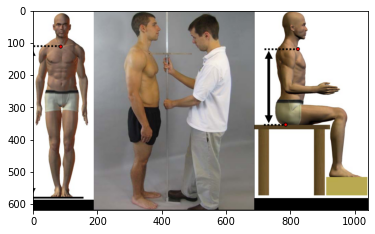

In [58]:
showImage("suprasternaleheight")

c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


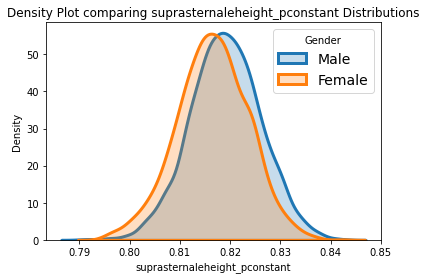

In [59]:
plotDistribution(df, "suprasternaleheight_pconstant")

#### Muscle Development Measures

##### Chest Width (size):

In [12]:
showImage("chestbreadth")

c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


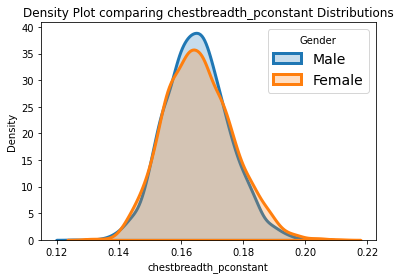

In [61]:
plotDistribution(df, "chestbreadth_pconstant")

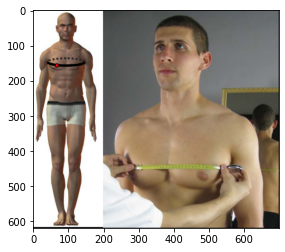

In [13]:
showImage("chestcircumference")

c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


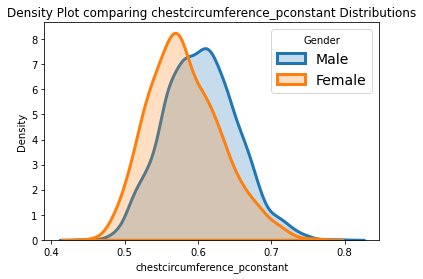

In [62]:
plotDistribution(df, "chestcircumference_pconstant")

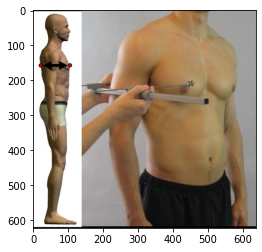

In [14]:
showImage("chestdepth")

c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


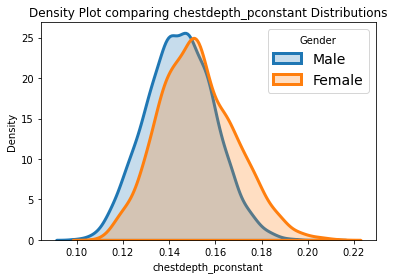

In [63]:
plotDistribution(df, "chestdepth_pconstant")

### Back

##### Back Width

##### INTERSCYE I 

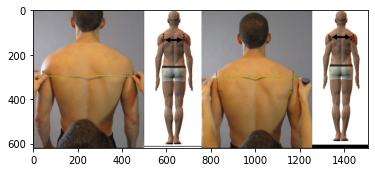

In [64]:
showImage("interscyei")

c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


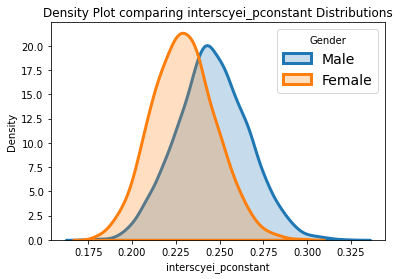

In [70]:
plotDistribution(df, "interscyei_pconstant")

##### INTERSCYE II

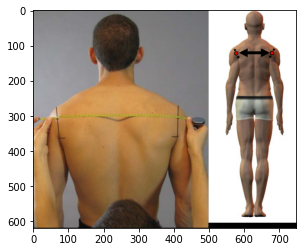

In [69]:
showImage("interscyeii")

c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


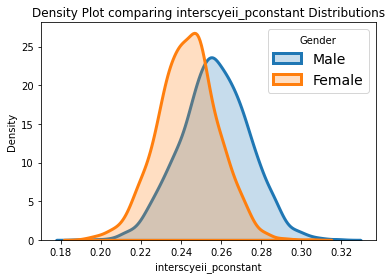

In [67]:
plotDistribution(df, "interscyeii_pconstant")

##### Back Height

##### WAIST BACK LENGTH (OMPHALION)*

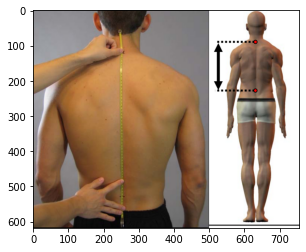

In [18]:
showImage("waistbacklength")

c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


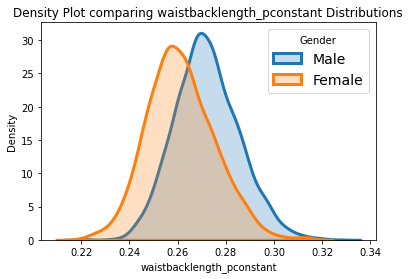

In [71]:
plotDistribution(df, "waistbacklength_pconstant")

### Waist

##### Bicristal Breadth

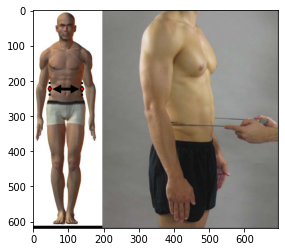

In [19]:
showImage("bicristalbreadth")

c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


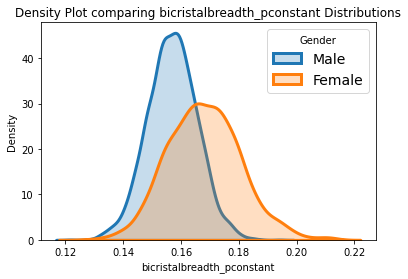

In [73]:
plotDistribution(df, "bicristalbreadth_pconstant")

##### Waist Breadth

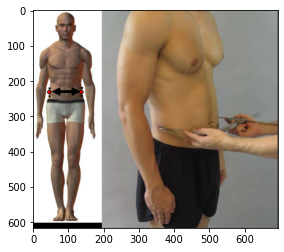

In [20]:
showImage("waistbreadth")

c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


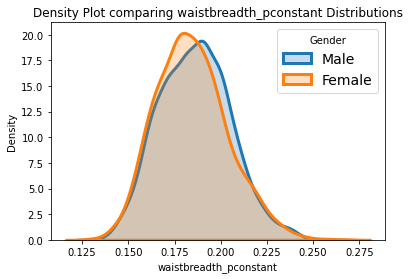

In [74]:
plotDistribution(df, "waistbreadth_pconstant")

##### Waist Circumference 

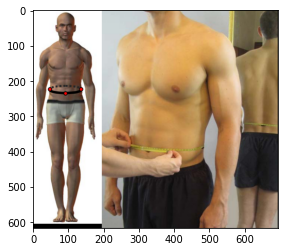

In [21]:
showImage("waistcircumference")

c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


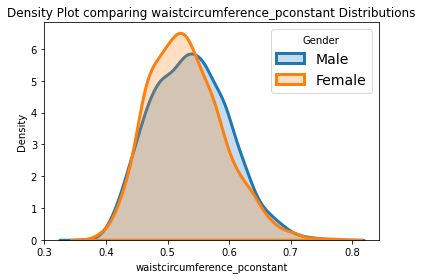

In [75]:
plotDistribution(df, "waistcircumference_pconstant")

##### Waist Depth

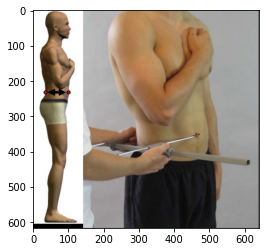

In [22]:
showImage("waistdepth")

c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


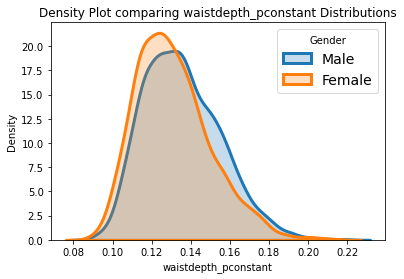

In [76]:
plotDistribution(df, "waistdepth_pconstant")

###### Abdominal Extension Depth, Sitting

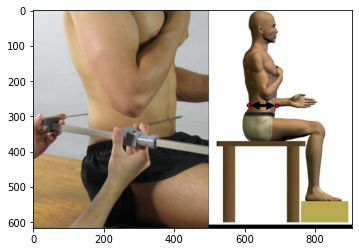

In [23]:
showImage("abdominalextensiondepthsitting")

c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


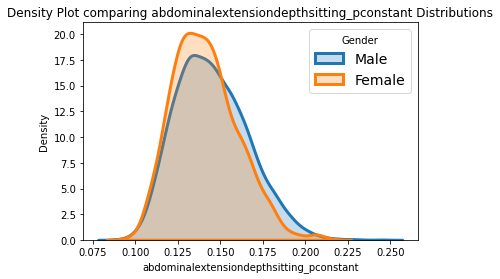

In [77]:
plotDistribution(df, "abdominalextensiondepthsitting_pconstant")

### Legs

##### Total Leg Height

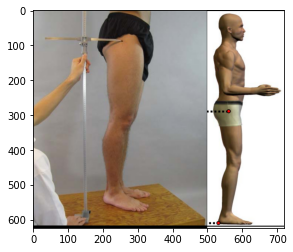

In [24]:
showImage("buttockheight")

c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


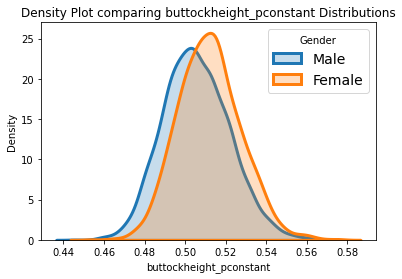

In [78]:
plotDistribution(df, "buttockheight_pconstant")

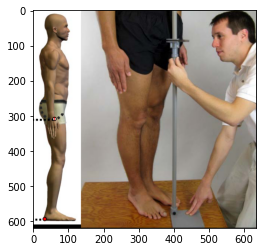

In [25]:
showImage("crotchheight")

c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


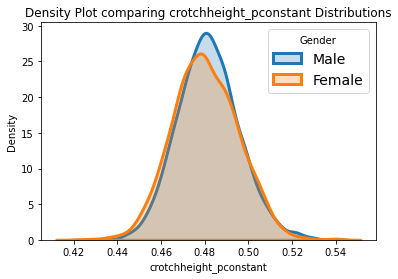

In [79]:
plotDistribution(df, "crotchheight_pconstant")

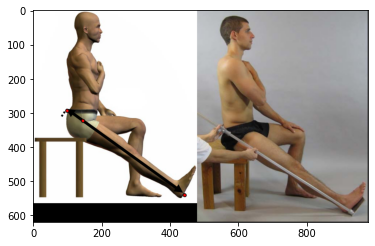

In [26]:
showImage("functionalleglength")

c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


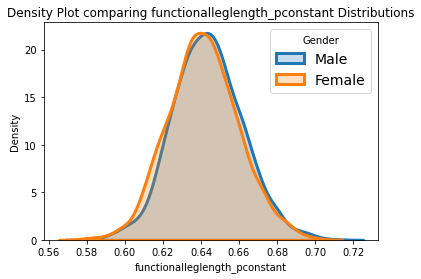

In [80]:
plotDistribution(df, "functionalleglength_pconstant")

In [28]:
showImage("trochanterionheight")

c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


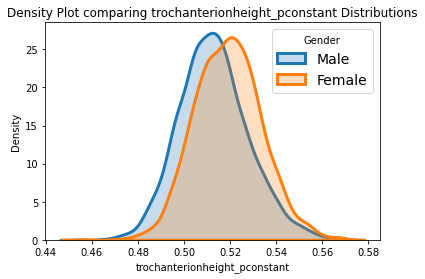

In [81]:
plotDistribution(df, "trochanterionheight_pconstant")

##### Femur

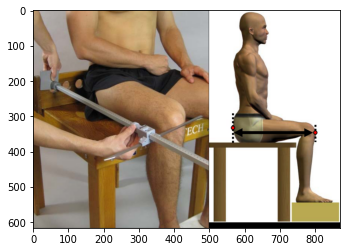

In [29]:
showImage("buttockkneelength")

In [82]:
plotDistribution(df, "buttockkneelength_pconstant")

c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


In [30]:
showImage("buttockpopliteallength")

c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


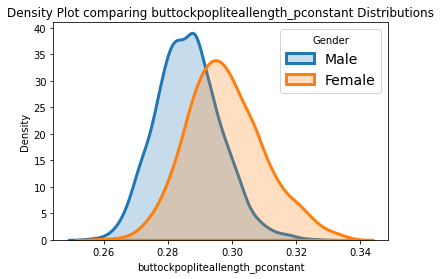

In [83]:
plotDistribution(df, "buttockpopliteallength_pconstant")

##### Tibia/Fibular

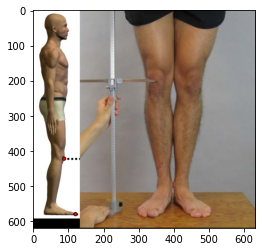

In [31]:
showImage("kneeheightmidpatella")

c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


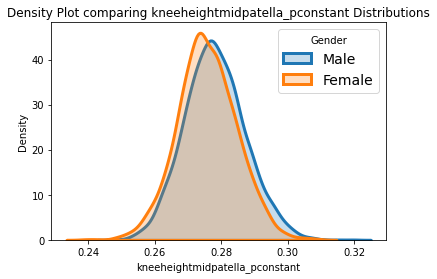

In [84]:
plotDistribution(df, "kneeheightmidpatella_pconstant")

In [32]:
showImage("kneeheightsitting")

c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


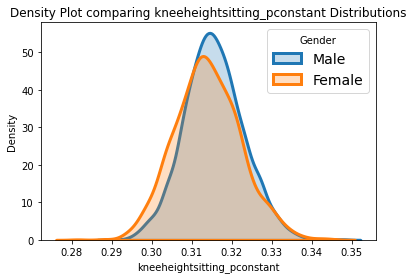

In [85]:
plotDistribution(df, "kneeheightsitting_pconstant")

In [33]:
showImage("lateralfemoralepicondyleheight")

c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


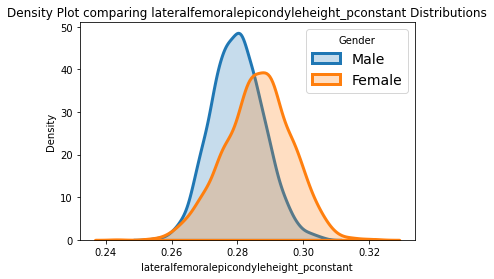

In [86]:
plotDistribution(df, "lateralfemoralepicondyleheight_pconstant")

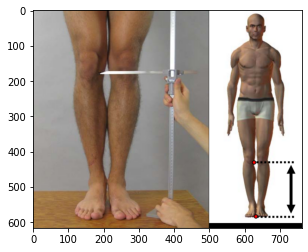

In [34]:
showImage("tibialheight")

In [87]:
plotDistribution(df, "tibialheight_pconstant")

c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


##### Muscle Development Measures

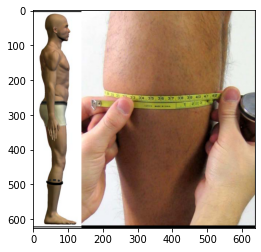

In [35]:
showImage("calfcircumference")

c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


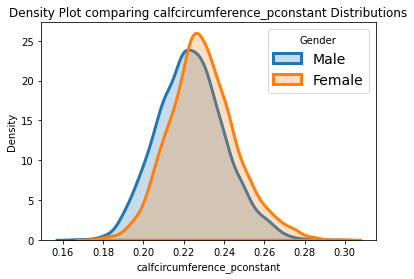

In [88]:
plotDistribution(df, "calfcircumference_pconstant")

In [36]:
showImage("lowerthighcircumference")

c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


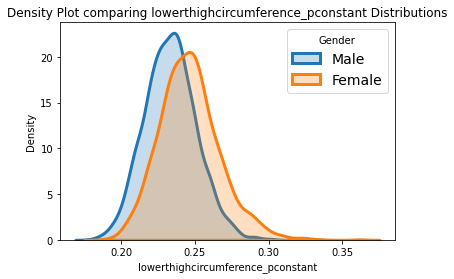

In [89]:
plotDistribution(df, "lowerthighcircumference_pconstant")

### Arms

##### Total Arm

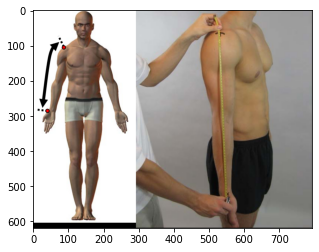

In [37]:
showImage("sleeveoutseam")

c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


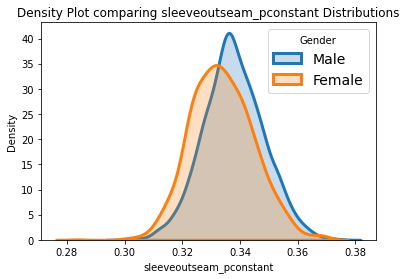

In [90]:
plotDistribution(df, "sleeveoutseam_pconstant")

##### Humerus

In [38]:
showImage("shoulderelbowlength")

c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


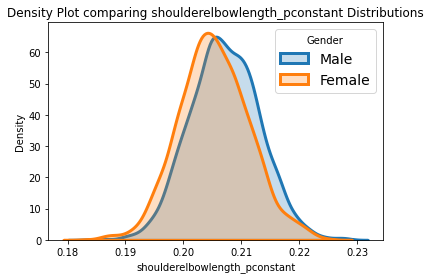

In [91]:
plotDistribution(df, "shoulderelbowlength_pconstant")

##### ulna/radius

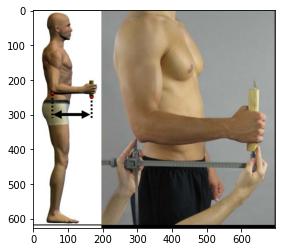

In [39]:
showImage("forearmcenterofgriplength")

In [92]:
plotDistribution(df, "forearmcenterofgriplength_pconstant")

c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


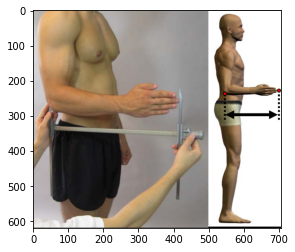

In [40]:
showImage("forearmhandlength")

c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


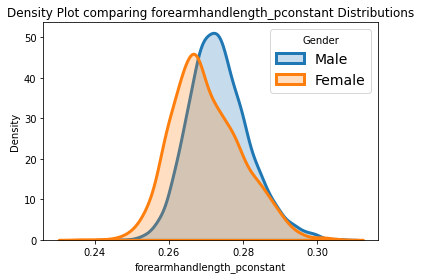

In [93]:
plotDistribution(df, "forearmhandlength_pconstant")

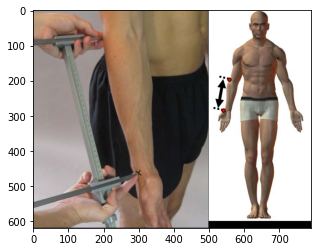

In [41]:
showImage("radialestylionlength")

In [94]:
plotDistribution(df, "radialestylionlength_pconstant")

c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


##### Muscle Development Measures

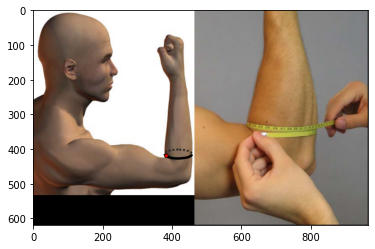

In [42]:
showImage("forearmcircumferenceflexed")

c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


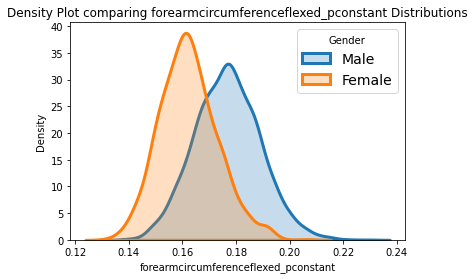

In [95]:
plotDistribution(df, "forearmcircumferenceflexed_pconstant")

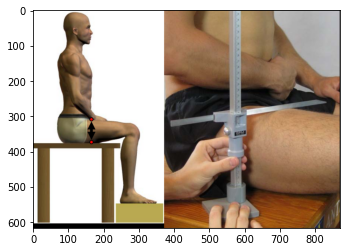

In [43]:
showImage("thighclearance")

c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


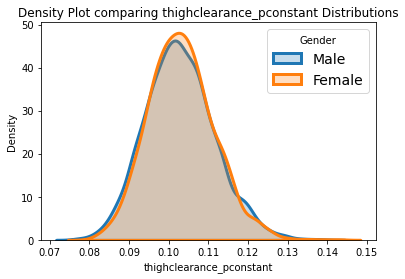

In [96]:
plotDistribution(df, "thighclearance_pconstant")

### Shoulder

##### BIDELTOID BREADTH

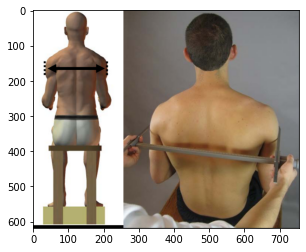

In [44]:
showImage("bideltoidbreadth")

In [97]:
plotDistribution(df, "bideltoidbreadth_pconstant")

c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


##### SHOULDER CIRCUMFERENCE*

In [45]:
showImage("shouldercircumference")

In [98]:
plotDistribution(df, "shouldercircumference_pconstant")

c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


##### Shoulder Length

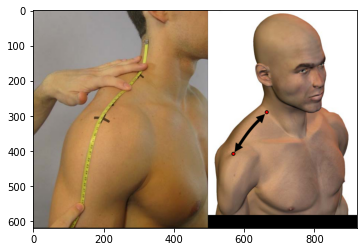

In [47]:
showImage("shoulderlength")

c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


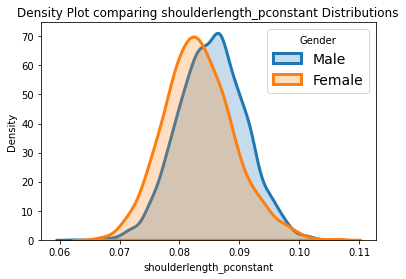

In [99]:
plotDistribution(df, "shoulderlength_pconstant")

### Butt

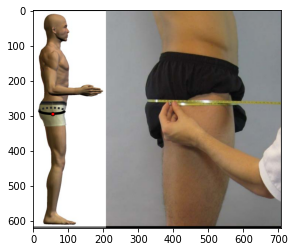

In [48]:
showImage("buttockcircumference")

In [100]:
plotDistribution(df, "buttockcircumference_pconstant")

c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


In [49]:
showImage("buttockdepth")

In [101]:
plotDistribution(df, "buttockdepth_pconstant")

c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


##### Hip Width

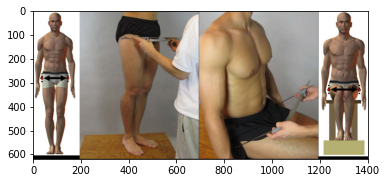

In [51]:
showImage("hipbreadth")

c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


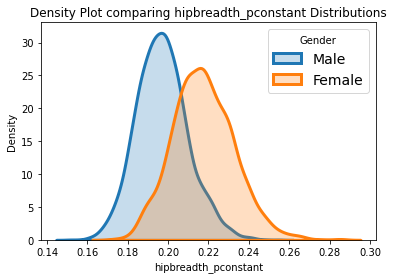

In [104]:
plotDistribution(df, "hipbreadth_pconstant")

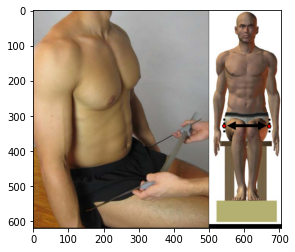

In [52]:
showImage("hipbreadthsitting")

c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


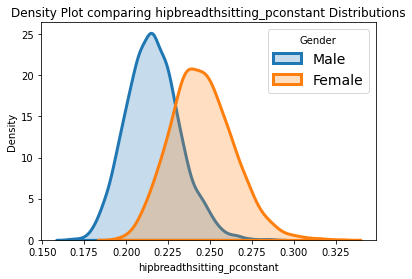

In [105]:
plotDistribution(df, "hipbreadthsitting_pconstant")